In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

sns.set_style('darkgrid')

In [2]:
# Load dataset
crop_data = pd.read_csv('Crop_recommendation.csv')
crop_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
# Basic info
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
# Basic overview
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
# Check for missing values
crop_data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
# Check for duplicates
crop_data.duplicated().sum()

0

### Exploratory Data Analysis

In [7]:
input_features = crop_data.columns.difference(['label'])
target_feature = ['label']

In [8]:
# Target feature
crop_data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
crop_data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

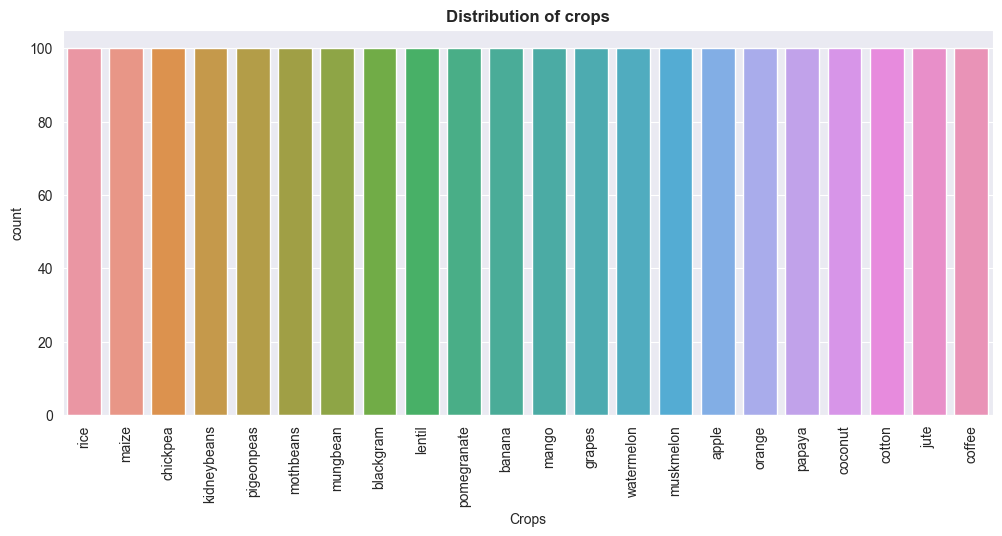

In [10]:
# Target feature
plt.figure(figsize=(12,5))
sns.countplot(x='label', data=crop_data)
plt.xticks(rotation=90)
plt.xlabel('Crops')
plt.title("Distribution of crops", fontweight='bold')
plt.show()

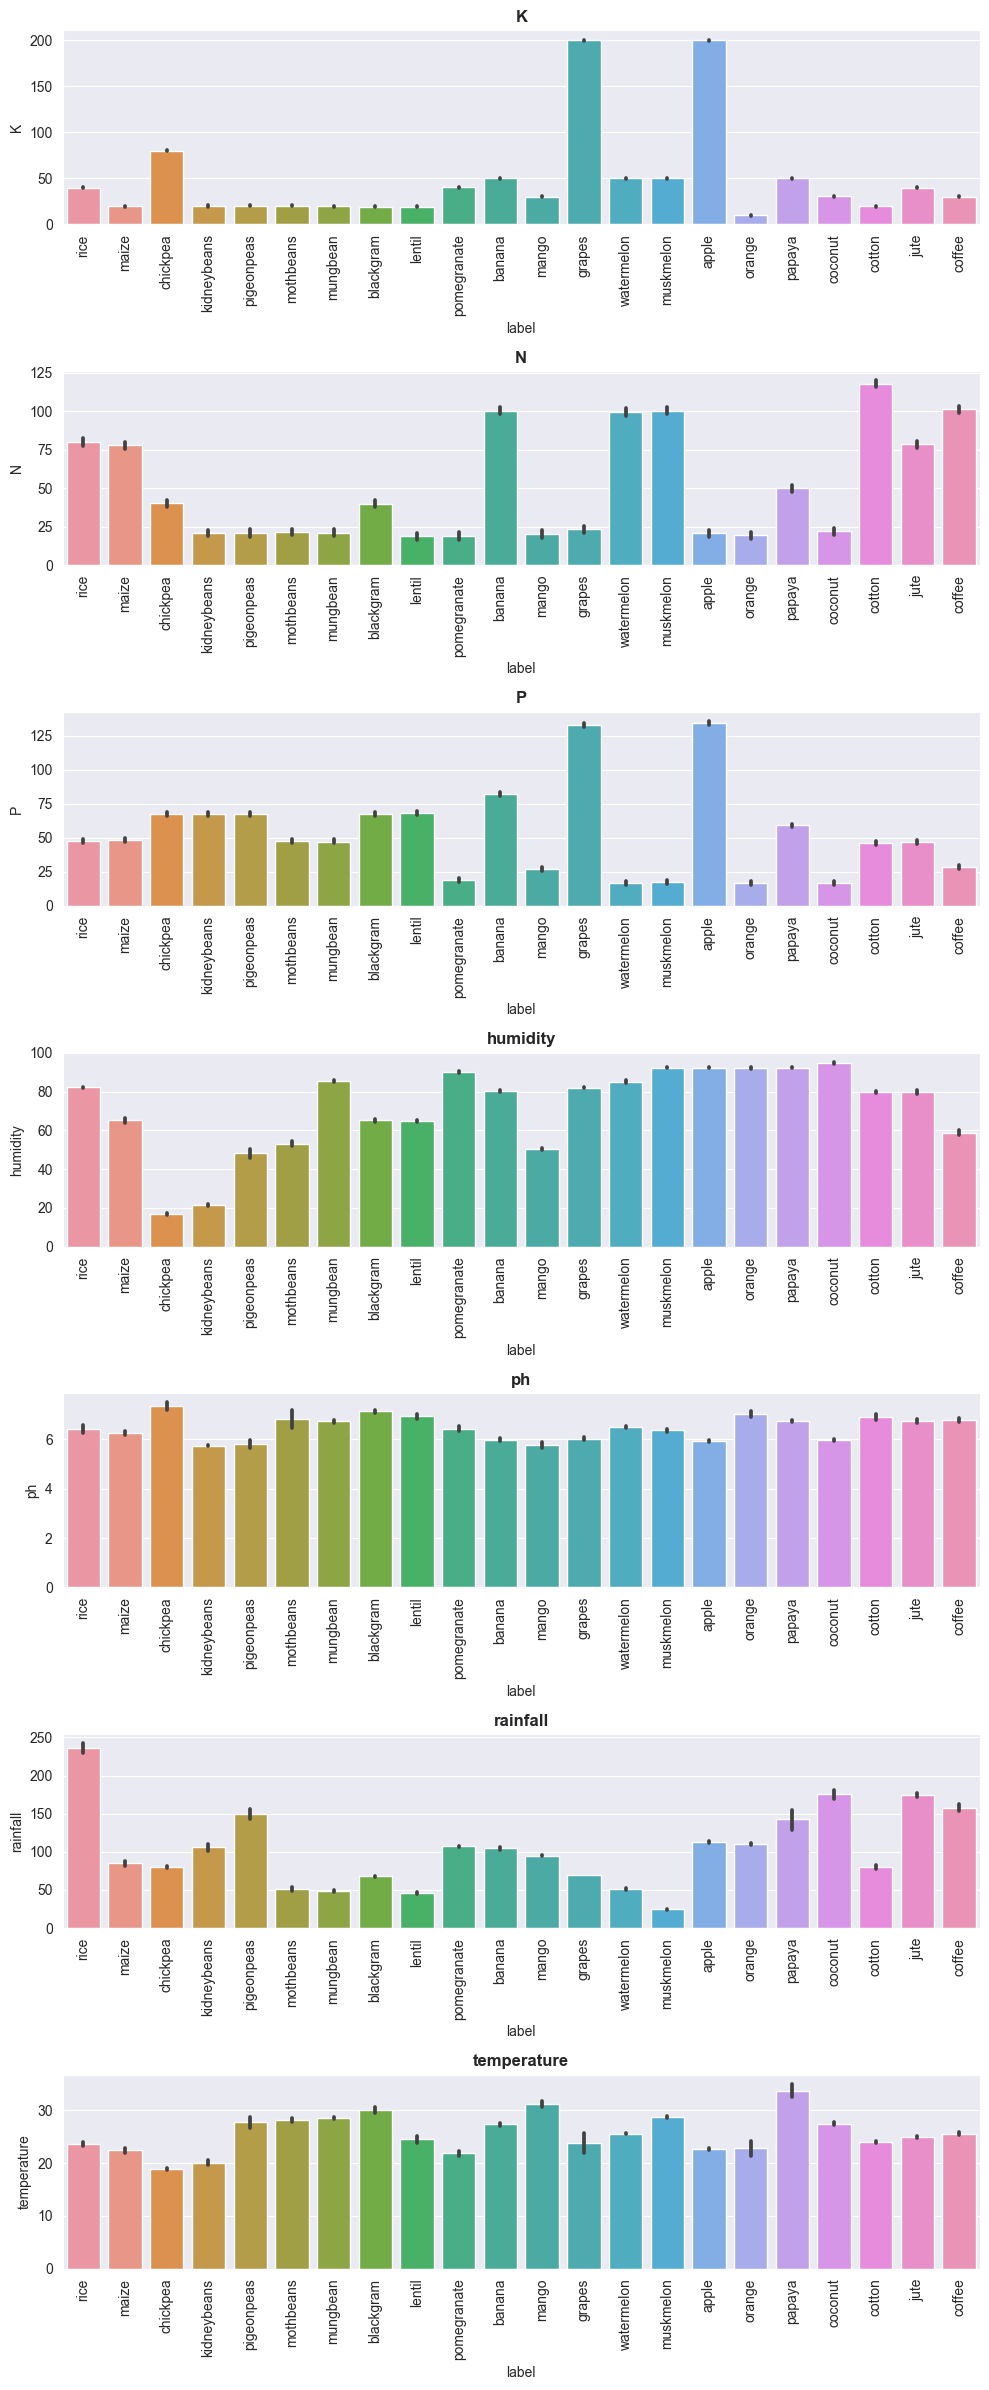

In [11]:
plt.figure(figsize=(10,24))
for index, i in enumerate(input_features):
    plt.subplot(7,1, index+1)
    sns.barplot(x='label',y=i, data=crop_data)
    plt.xticks(rotation=90)
    plt.title(f"{i}", fontweight='bold')
plt.tight_layout()


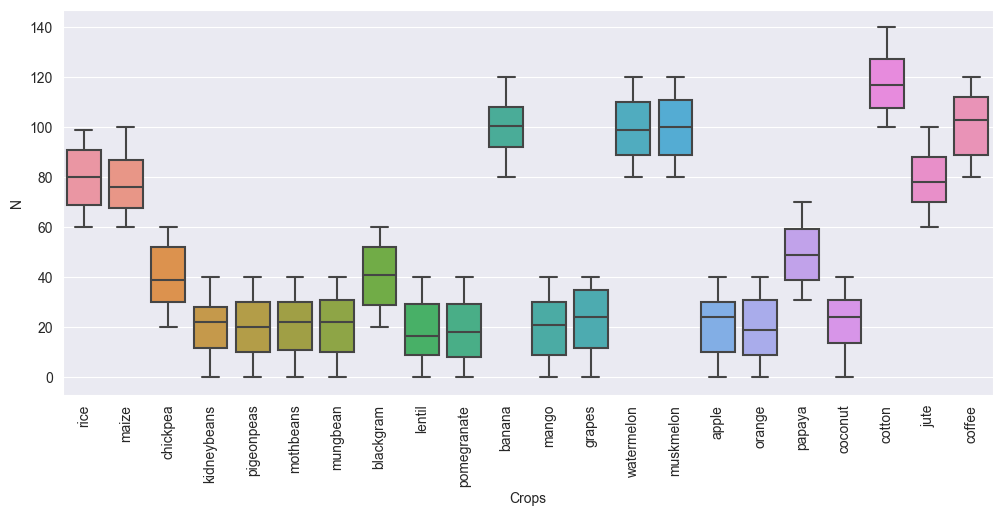

In [12]:
plt.figure(figsize=(12,5))
sns.boxplot(x='label',y='N', data=crop_data)
plt.xticks(rotation=90)
plt.xlabel('Crops')
plt.show()

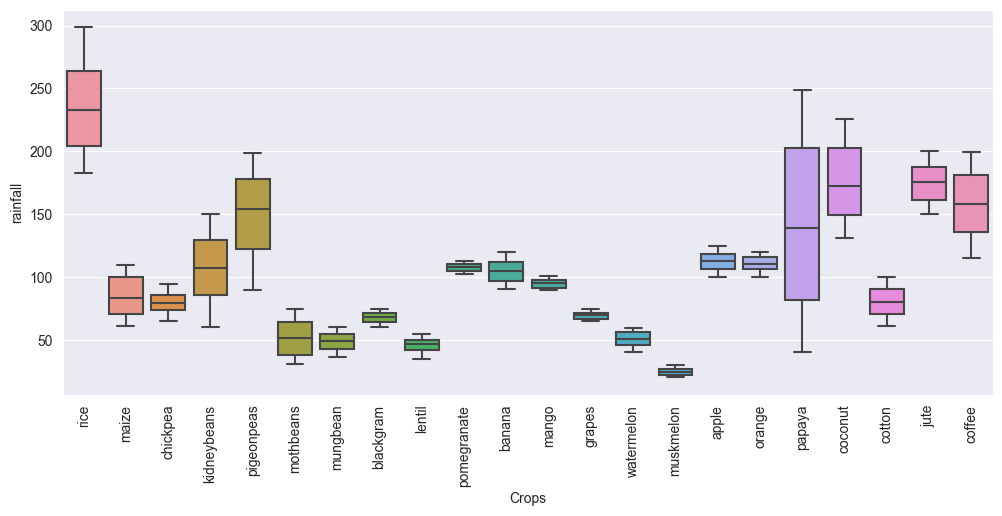

In [13]:
plt.figure(figsize=(12,5))
sns.boxplot(x='label',y='rainfall', data=crop_data)
plt.xticks(rotation=90)
plt.xlabel('Crops')
plt.show()

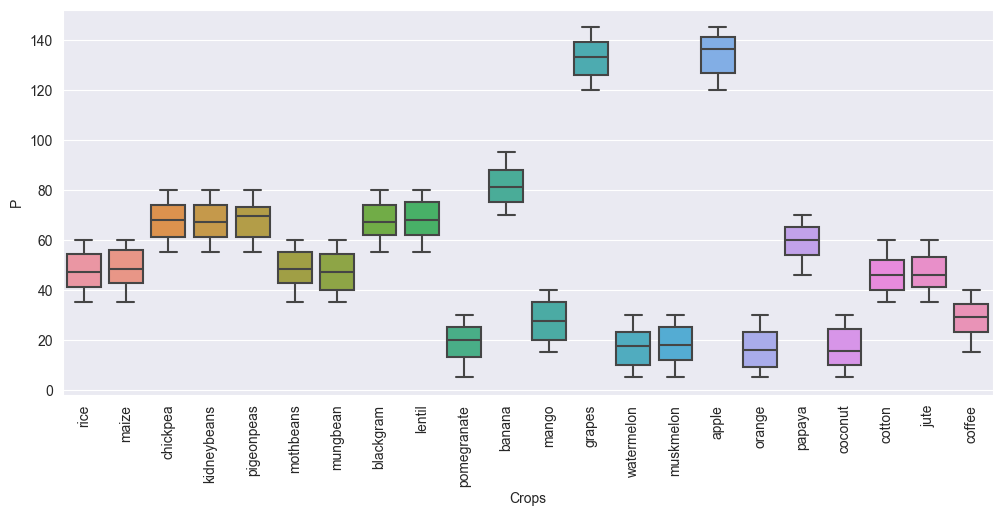

In [14]:
plt.figure(figsize=(12,5))
sns.boxplot(x='label',y='P', data=crop_data)
plt.xticks(rotation=90)
plt.xlabel('Crops')
plt.show()

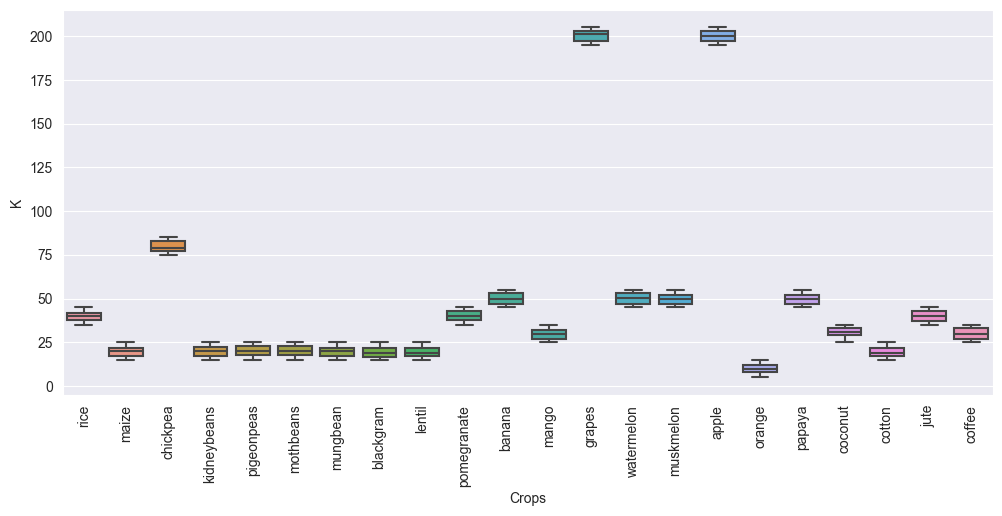

In [15]:
plt.figure(figsize=(12,5))
sns.boxplot(x='label',y='K', data=crop_data)
plt.xticks(rotation=90)
plt.xlabel('Crops')
plt.show()

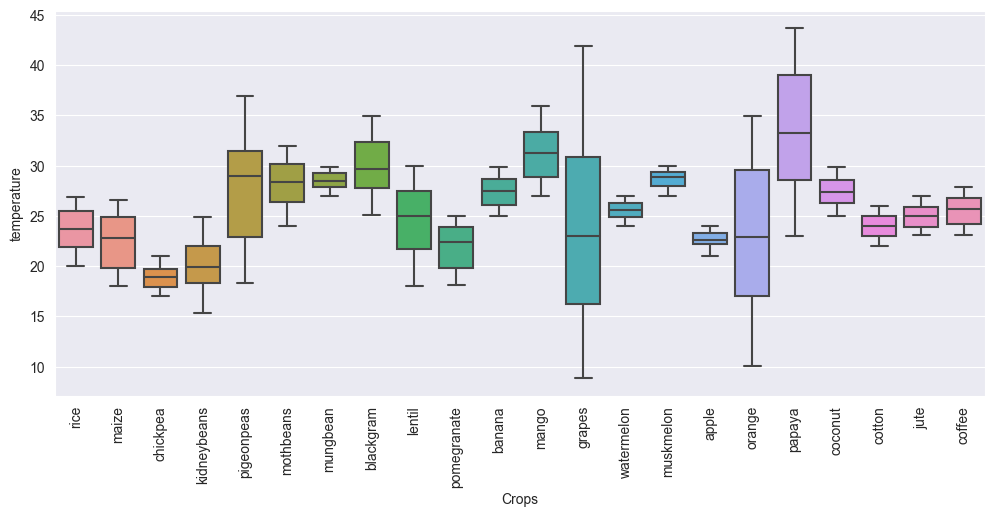

In [16]:
plt.figure(figsize=(12,5))
sns.boxplot(x='label',y='temperature', data=crop_data)
plt.xticks(rotation=90)
plt.xlabel('Crops')
plt.show()

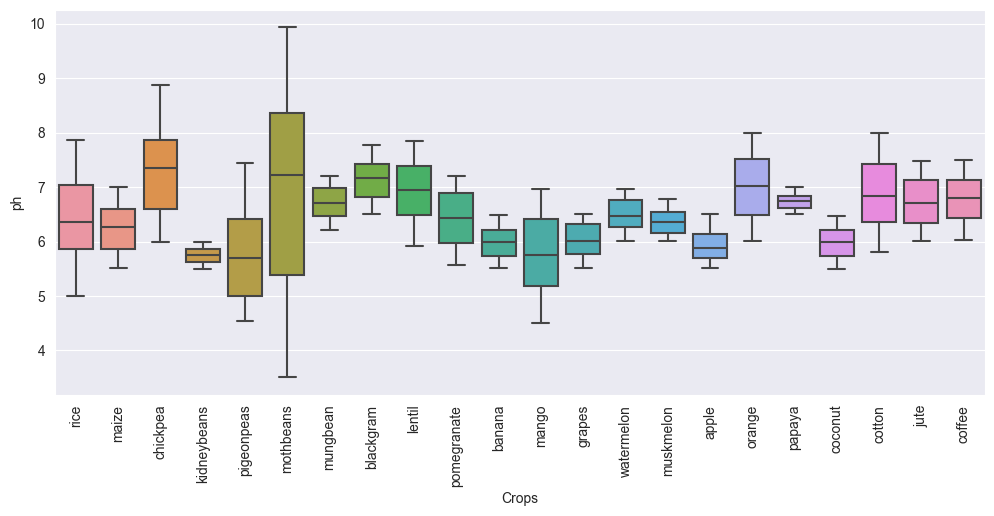

In [17]:
plt.figure(figsize=(12,5))
sns.boxplot(x='label',y='ph', data=crop_data)
plt.xticks(rotation=90)
plt.xlabel('Crops')
plt.show()

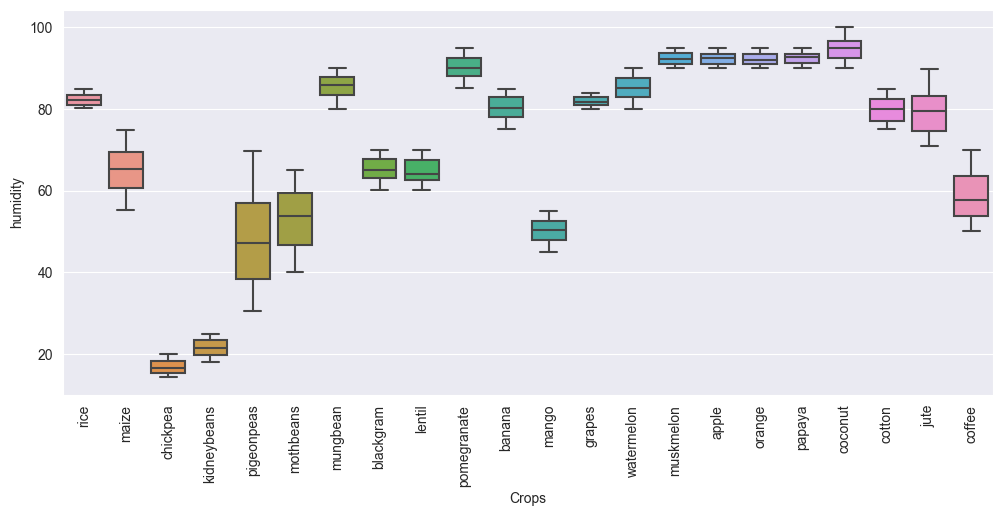

In [18]:
plt.figure(figsize=(12,5))
sns.boxplot(x='label',y='humidity', data=crop_data)
plt.xticks(rotation=90)
plt.xlabel('Crops')
plt.show()

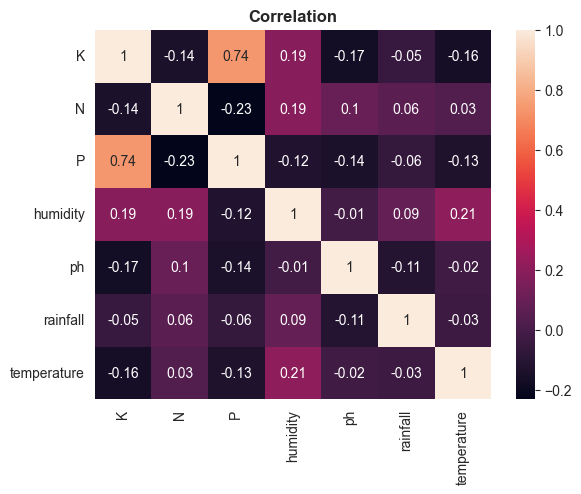

In [19]:
corr = round(crop_data[input_features].corr(),2)
sns.heatmap(corr, annot=True)
plt.title("Correlation", fontweight='bold')
plt.show()

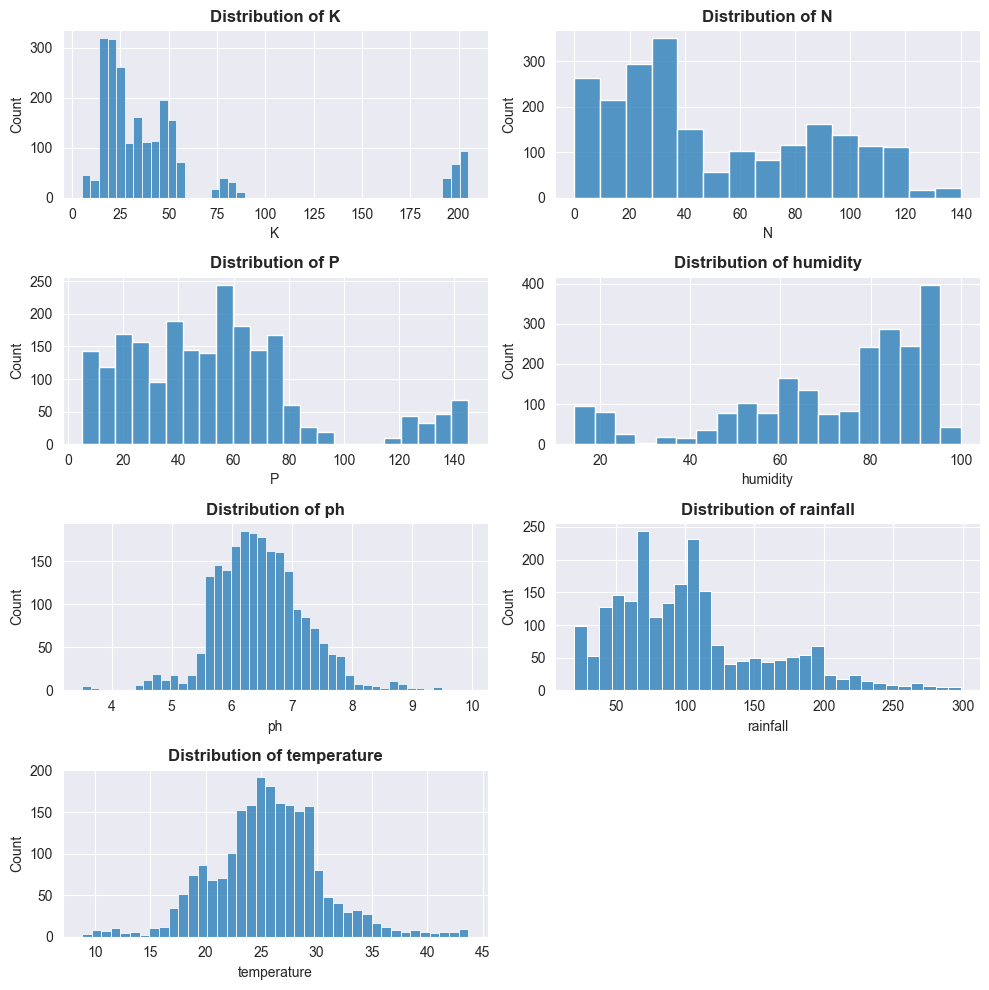

In [20]:
plt.figure(figsize=(10,10))
for index,i in enumerate(input_features):
    plt.subplot(4,2, index+1)
    sns.histplot(x=i, data=crop_data)
    plt.title(f"Distribution of {i}", fontweight='bold')
plt.tight_layout()


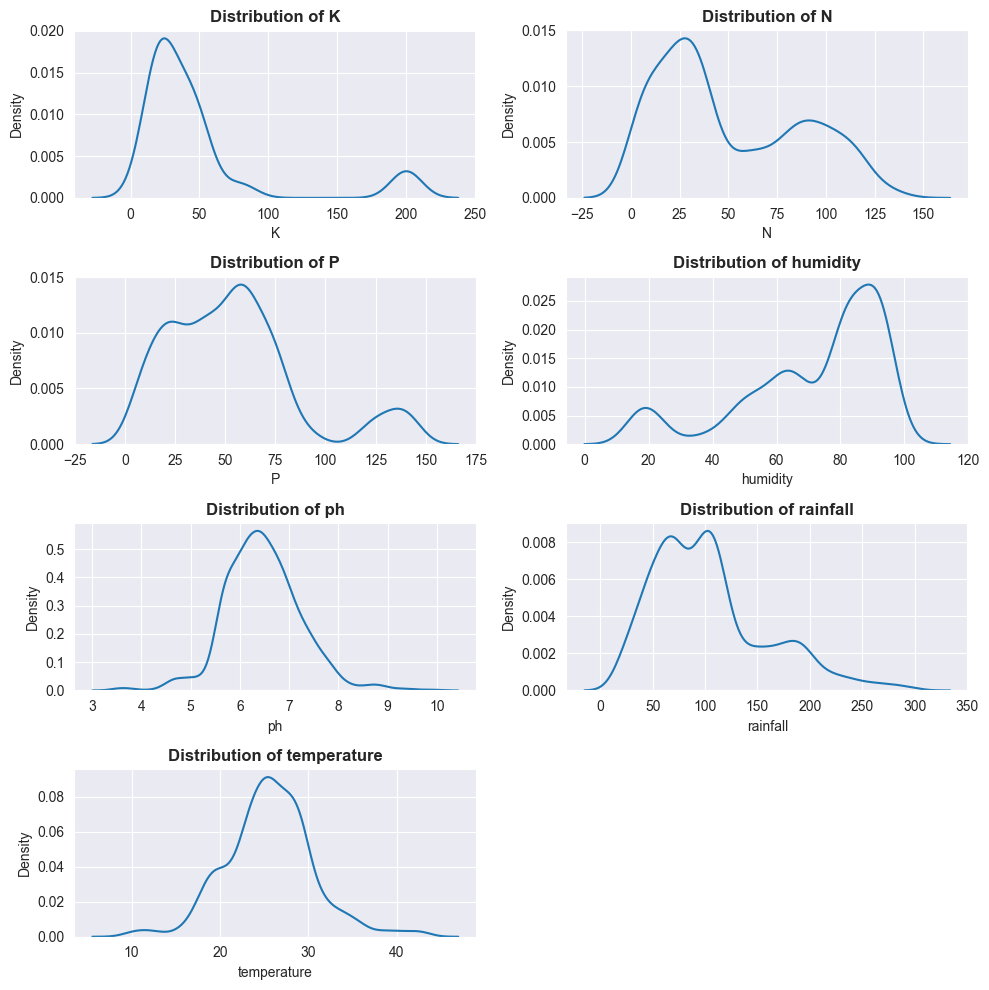

In [21]:
plt.figure(figsize=(10,10))
for index,i in enumerate(input_features):
    plt.subplot(4,2, index+1)
    sns.kdeplot(x=i, data=crop_data)
    plt.title(f"Distribution of {i}", fontweight='bold')
plt.tight_layout()

### Data Preprocessing

In [32]:
x = crop_data[input_features]
y = crop_data['label']

In [33]:
y = y.map({'mungbean':0, 'muskmelon':1, 'watermelon':2, 'lentil':3, 'jute':4, 'grapes':5, 'mothbeans':6,
            'banana':7, 'rice':8, 'kidneybeans':9, 'orange':10, 'coffee':11, 'pigeonpeas':12, 'cotton':13,
            'pomegranate':14, 'coconut':15, 'mango':16, 'maize':17, 'blackgram':18, 'chickpea':19, 
            'apple':20, 'papaya':21})

In [34]:
# Data partioning
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=23)

In [35]:
num_pipeline = Pipeline([
    ('si', SimpleImputer(strategy='median')),
    ('ss', StandardScaler(with_mean=False))
])

In [36]:
preprocessor = ColumnTransformer([
    ("num_pipeline", num_pipeline, input_features)
])

In [37]:
# Train and test data to preprocessor
X_train_arr = preprocessor.fit_transform(X_train)
X_test_arr = preprocessor.transform(X_test)

### Model Training

#### Logistic Regression

In [41]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_arr, y_train)

LogisticRegression(max_iter=2000)

In [45]:
y_test_pred = log_reg.predict(X_test_arr)
accuracy_score(y_test, y_test_pred)

0.9727272727272728

#### Random Forest

In [46]:
r_forest = RandomForestClassifier()
r_forest.fit(X_train_arr, y_train)

y_test_pred = r_forest.predict(X_test_arr)
accuracy_score(y_test, y_test_pred)

0.9977272727272727